In [1]:
import sys
import random
import copy
import matplotlib.pyplot as plt
sys.path.append("../")
from src.ga.construct import Indivdual, Population
from src.ga.operators import NonDominatedSort
from src.problems import dtlz3
from src.ga.operators import Operator

In [2]:
population = Population()
for i in range(50):
    population.append(
        Indivdual(chromosomes=[random.random() for i in range(10)],
                  num_objects=2,
                  directions=(1, 1))
    )

In [3]:
fitted_population = [p.allocationFitness(dtlz3) for p in population]

In [31]:
def crossover(population):
    childlen = copy.deepcopy(population)
    for i, couple in enumerate(zip(*[iter(childlen)]*2)):
        child1, child2 = Operator.simulatedBinaryCrossover(
                                                            couple[0].chromosomes,
                                                            couple[1].chromosomes, 
                                                            eta=10, probabiliry=1
                                                            )
        
        childlen[i] = couple[0].update_chromosomes(child1)
        childlen[i+1] = couple[1].update_chromosomes(child1)
            
    return childlen
def mutation(population):
    childlen = copy.deepcopy(population)
    for i, ind in enumerate(childlen):
        child= Operator.polynomialMutation(ind.chromosomes, eta=10, low=-10, up=10, probabiliry=1)
        childlen[i] = ind.update_chromosomes(child)
    return childlen

In [24]:
chil = crossover(population)
print(chil[0].chromosomes)
print(population[0].chromosomes)

[0.263252429806323, 0.25431674387056613, 0.7662574141091362, 0.3680050152392856, 0.9357345817150642, 0.4414451518087482, 0.5814338822421588, 0.06140363758448271, 0.3953277058604424, 0.545869384087787]
[0.5961452243949656, 0.4636536168212947, 0.7611050316279625, 0.3692814400260003, 0.924598881028197, 0.43571400387443515, 0.5837240026113945, 0.43635845229863357, 0.21368013314951884, 0.5470418818557518]


In [33]:
chil = mutation(population)
print(chil[0].chromosomes)
print(population[0].chromosomes)

[0.7859304344078959, 2.6966951365009986, 1.5050128357747947, 2.831939812750935, 1.829552918835299, -0.6171963717223234, 0.78431350736546, -0.19301399057491941, -0.09091702109231248, 2.286483907932883]
[0.5961452243949656, 0.4636536168212947, 0.7611050316279625, 0.3692814400260003, 0.924598881028197, 0.43571400387443515, 0.5837240026113945, 0.43635845229863357, 0.21368013314951884, 0.5470418818557518]


In [7]:
sort = NonDominatedSort()
sorted_sample = sort(fitted_population)
ranks = sorted_sample.ranks()

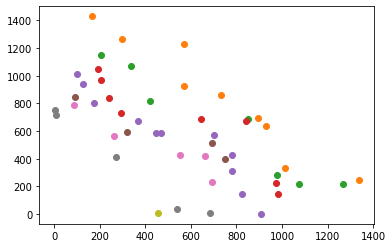

In [5]:
for rank in range(10):
    data = sorted_sample.extract_rank(rank)
    x = [ind.fitness[0] for ind in data]
    y = [ind.fitness[1] for ind in data]
    plt.scatter(x, y)

In [10]:
list(zip(*[iter(population)]*2))

[(Indivdual(chromosomes=[0.04361506423237815, 0.4899311869834032, 0.891622039117823, 0.3046000217062146, 0.9291762166692983, 0.47990587389736705, 0.8068325057225512, 0.5009228042735488, 0.7385058387447115, 0.6198034495544684], num_objects=2, directions=(1, 1), fitness=[], rank=None),
  Indivdual(chromosomes=[0.553089437154213, 0.8285558505339568, 0.9480036272750801, 0.8960682329183282, 0.23651170870590998, 0.9793959483526503, 0.6272992586657585, 0.271059951275619, 0.011551070477402892, 0.5447788398381336], num_objects=2, directions=(1, 1), fitness=[], rank=None)),
 (Indivdual(chromosomes=[0.38348305515115133, 0.7955650791693148, 0.1872825045133708, 0.3600845632265711, 0.5385781612515856, 0.8364339606499593, 0.03353759088037345, 0.3352143544436038, 0.971664850580545, 0.18362455182856852], num_objects=2, directions=(1, 1), fitness=[], rank=None),
  Indivdual(chromosomes=[0.14618388777529456, 0.34933206355021085, 0.9699003360145276, 0.2313671983864205, 0.3086147403416055, 0.57611210906014